In [2]:
import pandas as pd
import numpy as np

In [3]:
mall = pd.read_csv("new_data/mall_v1.csv")
store = pd.read_csv("new_data/store_v1.csv")
ref_traffic = pd.read_csv('new_data/referenciel_traffic_v1.csv')
people_flow = pd.read_csv('new_data/people_flow_v1.csv')
cost = pd.read_csv("new_data/cost_v1.csv")
dwell = pd.read_csv("new_data/dwell_time_v1.csv")

In [4]:
people_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   block_id                           3925 non-null   int64  
 1   external_mall_id                   3925 non-null   int64  
 2   store_visits_monthly_average       3925 non-null   float64
 3   store_window_flow_monthly_average  3925 non-null   float64
 4   store_visits_daily_average         3925 non-null   float64
 5   store_window_flow_daily_average    3925 non-null   float64
 6   store_total_visits                 3925 non-null   int64  
 7   store_total_window_flow            3925 non-null   int64  
 8   days_with_traffic_data             3925 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 276.1 KB


In [ ]:
# Group by ['block_id', 'external_mall_id'] and keep the rows with the largest days_with_traffic_data
people_flow = people_flow.loc[
    people_flow.groupby(['block_id', 'external_mall_id'])['days_with_traffic_data'].idxmax()
]

people_flow.reset_index(drop=True, inplace=True)

print(people_flow)


      block_id  external_mall_id  store_visits_monthly_average  \
0            1                 7                          0.00   
1            2                 7                       3054.11   
2            3                 7                      13460.89   
3            4                 7                       9491.56   
4            5                 7                      42984.80   
...        ...               ...                           ...   
3835     13813                36                     128026.75   
3836     13814                36                     432541.25   
3837     13815                36                      46303.75   
3838     14833                10                       1614.00   
3839     14857                18                        987.00   

      store_window_flow_monthly_average  store_visits_daily_average  \
0                             822981.78                        0.00   
1                             907698.89                      109.

# Join people_flow, dwell with store and mall data, keep only Westfield malls

In [8]:
customer_behavior = pd.merge(people_flow, dwell, how = "outer",  on=['block_id', 'external_mall_id'])
customer_behavior = pd.merge(customer_behavior, ref_traffic, how="left", on=['block_id', 'external_mall_id'])
customer_behavior = pd.merge(customer_behavior, store, how="left", on="store_id")
customer_behavior = pd.merge(customer_behavior, mall, how="left", on="mall_id")
customer_behavior["sales/visits"] = customer_behavior["store_sales_r12m"] / customer_behavior["store_visits_monthly_average"] / 12
customer_behavior["visits/window"] = customer_behavior["store_visits_monthly_average"]/customer_behavior["store_window_flow_monthly_average"]
customer_behavior = customer_behavior[customer_behavior['mall_name'].str.contains('Westfield', case=False, na=False)]
customer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3872 entries, 0 to 4083
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   block_id                           3872 non-null   int64  
 1   external_mall_id                   3872 non-null   int64  
 2   store_visits_monthly_average       3840 non-null   float64
 3   store_window_flow_monthly_average  3840 non-null   float64
 4   store_visits_daily_average         3840 non-null   float64
 5   store_window_flow_daily_average    3840 non-null   float64
 6   store_total_visits                 3840 non-null   float64
 7   store_total_window_flow            3840 non-null   float64
 8   days_with_traffic_data             3840 non-null   float64
 9   average_dwell_time                 3569 non-null   float64
 10  median_dwell_time                  3569 non-null   float64
 11  store_id                           3872 non-null   float64
 1

In [12]:
customer_behavior[customer_behavior["days_with_traffic_data"]>=30].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3814 entries, 0 to 4040
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   block_id                           3814 non-null   int64  
 1   external_mall_id                   3814 non-null   int64  
 2   store_visits_monthly_average       3814 non-null   float64
 3   store_window_flow_monthly_average  3814 non-null   float64
 4   store_visits_daily_average         3814 non-null   float64
 5   store_window_flow_daily_average    3814 non-null   float64
 6   store_total_visits                 3814 non-null   float64
 7   store_total_window_flow            3814 non-null   float64
 8   days_with_traffic_data             3814 non-null   float64
 9   average_dwell_time                 3529 non-null   float64
 10  median_dwell_time                  3529 non-null   float64
 11  store_id                           3814 non-null   float64
 1

Traffic vs. Engagement
Analyze how traffic (store visits) correlates with dwell time, sales efficiency (sales/visits)

In [17]:
df.describe()

,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data,average_dwell_time,median_dwell_time,store_id,mall_id,store_sales_r12m,store_rent_r12m,store_area,total_mall_area,sales/visits,visits/window
count,3392.000000,3392.000000,3392.000000,3.392000e+03,3392.000000,3392.000000,3.392000e+03,3.392000e+03,3392.000000,3170.000000,3170.000000,3392.000000,3392.000000,2.569000e+03,2.486000e+03,3392.000000,3392.000000,2569.000000,3392.000000
mean,5430.893278,20.137087,21639.031335,6.558340e+05,783.772379,23769.518154,2.437183e+05,7.258864e+06,310.227594,879.547900,561.066246,5662.426887,26.132665,5.184004e+06,5.976914e+05,456.600245,96431.341539,inf,0.037257
std,2657.572786,7.827717,36278.994462,4.385554e+05,1316.830072,15964.144561,4.235524e+05,5.176812e+06,71.736999,817.015614,747.971359,3994.377891,24.600256,1.628633e+07,1.837501e+06,1378.970606,29013.837422,NaN,0.056020
min,1.000000,7.000000,0.000000,4.908045e+04,0.000000,1783.770000,0.000000e+00,2.586460e+05,100.000000,137.770172,60.000000,1.000000,0.000000,0.000000e+00,-4.800000e+04,0.000000,35087.800000,0.000000,0.000000
25%,4335.750000,14.000000,4754.400000,3.736944e+05,173.012500,13361.037500,5.062250e+04,3.868688e+06,277.000000,374.336886,180.000000,1870.750000,5.000000,4.994850e+05,8.595650e+04,72.995000,74438.400000,2.867457,0.009124
50%,5919.500000,19.000000,10008.505000,5.575925e+05,363.170000,20097.530000,1.091785e+05,5.992162e+06,361.500000,545.186076,240.000000,5193.000000,17.000000,1.150762e+06,1.805820e+05,150.000000,91858.100000,9.523632,0.018318
75%,6955.250000,26.000000,23289.155000,8.115434e+05,844.557500,29422.420000,2.599505e+05,8.928986e+06,366.000000,1031.324552,480.000000,10059.500000,59.000000,3.145010e+06,4.456248e+05,318.467500,108792.500000,31.974432,0.041327
max,13578.000000,33.000000,573582.890000,6.131568e+06,20648.980000,217787.930000,7.079252e+06,7.971038e+07,366.000000,7074.316406,6840.000000,12429.000000,68.000000,2.724081e+08,6.461468e+07,24811.000000,162896.400000,inf,0.790122


In [18]:
df = customer_behavior[customer_behavior["days_with_traffic_data"]>=30]

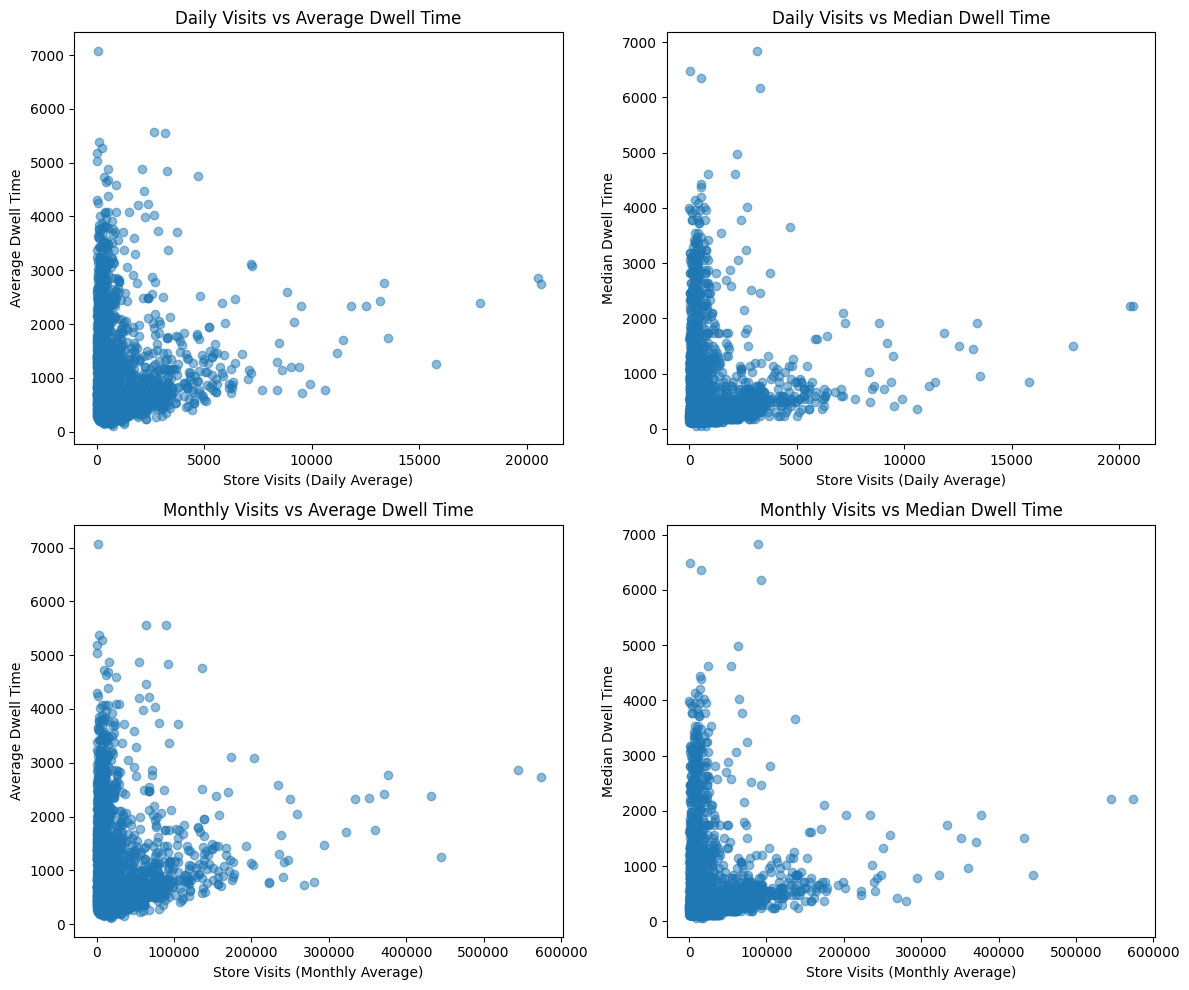

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Daily Visits vs Average Dwell Time
axes[0, 0].scatter(df['store_visits_daily_average'], df['average_dwell_time'], alpha=0.5)
axes[0, 0].set_title("Daily Visits vs Average Dwell Time")
axes[0, 0].set_xlabel("Store Visits (Daily Average)")
axes[0, 0].set_ylabel("Average Dwell Time")

# Daily Visits vs Median Dwell Time
axes[0, 1].scatter(df['store_visits_daily_average'], df['median_dwell_time'], alpha=0.5)
axes[0, 1].set_title("Daily Visits vs Median Dwell Time")
axes[0, 1].set_xlabel("Store Visits (Daily Average)")
axes[0, 1].set_ylabel("Median Dwell Time")

# Monthly Visits vs Average Dwell Time
axes[1, 0].scatter(df['store_visits_monthly_average'], df['average_dwell_time'], alpha=0.5)
axes[1, 0].set_title("Monthly Visits vs Average Dwell Time")
axes[1, 0].set_xlabel("Store Visits (Monthly Average)")
axes[1, 0].set_ylabel("Average Dwell Time")

# Monthly Visits vs Median Dwell Time
axes[1, 1].scatter(df['store_visits_monthly_average'], df['median_dwell_time'], alpha=0.5)
axes[1, 1].set_title("Monthly Visits vs Median Dwell Time")
axes[1, 1].set_xlabel("Store Visits (Monthly Average)")
axes[1, 1].set_ylabel("Median Dwell Time")

plt.tight_layout()
plt.show()


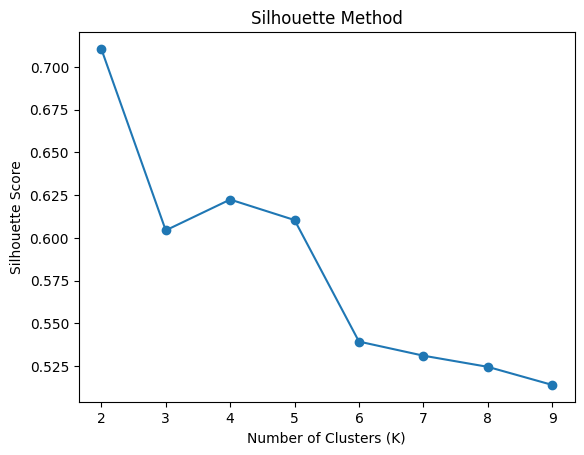

In [63]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


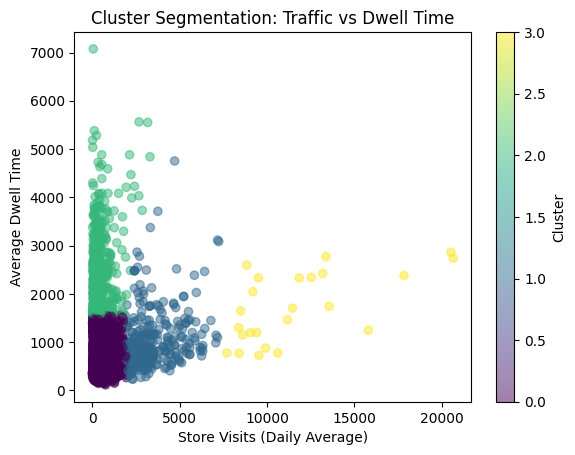

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['store_visits_daily_average', 'average_dwell_time']].dropna()

kmeans = KMeans(n_clusters=4, random_state=4)
X['Cluster'] = kmeans.fit_predict(X)

plt.scatter(X['store_visits_daily_average'], X['average_dwell_time'], c=X['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Cluster Segmentation: Traffic vs Dwell Time")
plt.xlabel("Store Visits (Daily Average)")
plt.ylabel("Average Dwell Time")
plt.colorbar(label='Cluster')
plt.show()


Cluster 0 (Purple):
Low store visits and low average dwell time.
Likely represents underperforming stores (low traffic, low engagement).

Cluster 1 (Yellow):
High store visits but relatively low dwell time.
Likely represents high-traffic stores where customers spend less time, such as convenience stores or fast-moving retail.

Cluster 2 (Green):
Moderate store visits but very high dwell time.
Likely represents specialty or high-engagement stores, where customers stay for a long time (e.g., restaurants, bookstores).

Cluster 3 (Blue):
Moderate-to-high store visits and moderate dwell time.
Represents balanced stores, possibly offering both convenience and some level of customer engagement.

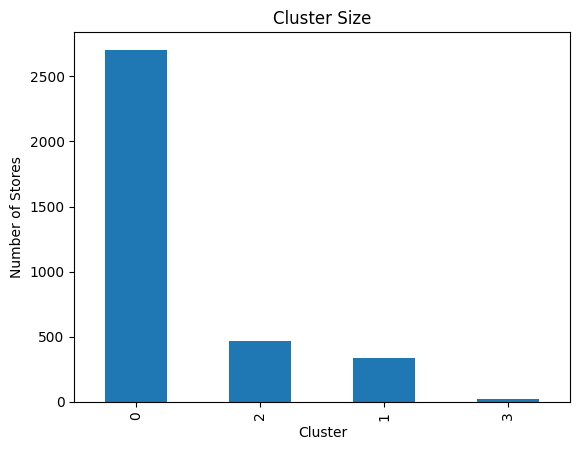

In [72]:
X['Cluster'].value_counts().plot(kind='bar')
plt.title("Cluster Size")
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")
plt.show()


In [73]:

cluster_summary = X.groupby('Cluster').agg({
    'store_visits_daily_average': ['mean', 'std'],
    'average_dwell_time': ['mean', 'std']
})
print(cluster_summary)


        store_visits_daily_average              average_dwell_time            
                              mean          std               mean         std
Cluster                                                                       
0                       501.142109   439.397098         546.572913  302.086353
1                      3341.360774  1234.798810         990.132353  590.652070
2                       450.816746   497.088870        2550.728092  814.913891
3                     11646.632083  3731.525782        1725.624209  725.403029


In [74]:
df['Cluster'] = X['Cluster']
business_summary = df.groupby(['Cluster', 'store_branch_level_1']).agg({
    'store_visits_daily_average': 'mean',
    'average_dwell_time': 'mean'
})
print(business_summary)


                                        store_visits_daily_average  \
Cluster store_branch_level_1                                         
0.0     Auto                                            230.974000   
        Bags & Footwear & Accessories                   581.738935   
        Culture & Media & Technology                    464.856721   
        Department Stores                              1880.400000   
        Entertainment                                   435.586429   
        Fashion apparel                                 478.972638   
        Fitness                                         115.680000   
        Food & Beverage Services                        551.882951   
        Food Stores & Mass Merchandise                  756.030870   
        Gifts                                           759.379140   
        Health & Beauty                                 430.222596   
        Home                                            614.002500   
        Jewellery   

## Recommendations for Each Cluster
# Cluster 0 (Low Visits, Low Dwell Time)
Potential Issues:
Poor location, unattractive layout, or uninteresting products.
Actionable Steps:
Redesign the layout to attract more foot traffic.
Run promotions or partnerships with nearby high-traffic stores (Cluster 1/3).
Evaluate the product mix or consider a different store format.
# Cluster 1 (High Visits, Low Dwell Time)
Potential Issues:
Customers are not encouraged to stay longer (e.g., lack of engaging displays or seating areas).
Actionable Steps:
Introduce engagement points such as interactive displays, sampling areas, or small seating spaces.
Upsell or cross-sell products to increase average transaction value.
# Cluster 2 (Moderate Visits, High Dwell Time)
Potential Issues:
Potentially underutilizing the high dwell time (customers stay long but spend less).
Actionable Steps:
Convert dwell time into higher sales through targeted promotions or personalized recommendations.
Optimize staffing to cater to customer needs during their long visits.
# Cluster 3 (Moderate-High Visits, Moderate Dwell Time)
Potential Issues:
Stores are balanced but could still improve either traffic or engagement for higher performance.
Actionable Steps:
Invest in moderate improvements to both traffic and engagement to push these stores into Cluster 1 or 2.
Use Cluster 3 stores as benchmarks for underperforming stores in Cluster 0.

In [78]:
df.groupby(['Cluster', 'store_branch_level_1'])['block_id'].count()

Cluster  store_branch_level_1          
0.0      Auto                                5
         Bags & Footwear & Accessories     263
         Culture & Media & Technology      183
         Department Stores                   1
         Entertainment                      14
         Fashion apparel                   849
         Fitness                             1
         Food & Beverage Services          305
         Food Stores & Mass Merchandise     23
         Gifts                              93
         Health & Beauty                   389
         Home                              128
         Jewellery                         204
         Luxury                              5
         Other                              33
         Services                           72
         Sport                             135
1.0      Bags & Footwear & Accessories      10
         Culture & Media & Technology       28
         Department Stores                   7
         Entertainme

In [77]:
df.groupby(['Cluster', 'mall_country'])['block_id'].count()

Cluster  mall_country  
0.0      Austria           351
         Czech Republic    209
         France            886
         Germany           114
         Netherlands       133
         Poland            316
         Spain             322
         Sweden            258
         United Kingdom    114
1.0      Austria            24
         Czech Republic     12
         France            130
         Germany            33
         Netherlands        18
         Poland             29
         Spain              36
         Sweden             20
         United Kingdom     34
2.0      Austria            55
         Czech Republic     16
         France            138
         Germany             1
         Netherlands        26
         Poland             47
         Spain              94
         Sweden             51
         United Kingdom     36
3.0      Czech Republic      1
         France             10
         Germany             2
         Netherlands         1
         Poland

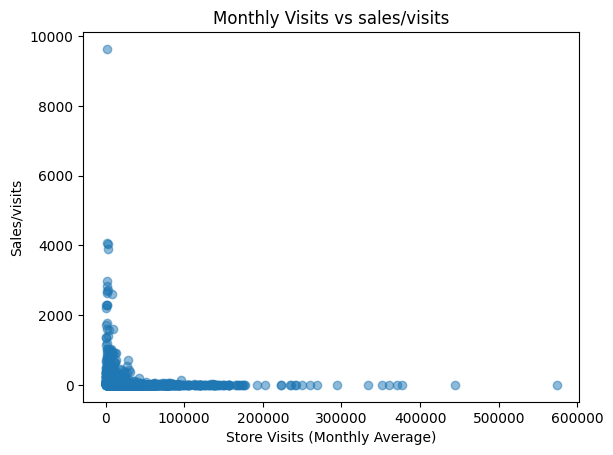

In [ ]:
# Monthly Visits vs Sales/Visits
plt.scatter(df['store_visits_monthly_average'], df['sales/visits'], alpha=0.5)
plt.title("Monthly Visits vs sales/visits")
plt.xlabel("Store Visits (Monthly Average)")
plt.ylabel("Sales/visits")
plt.show()

In [39]:
df[df['sales/visits']>10000]

,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data,average_dwell_time,...,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,mall_name,mall_country,total_mall_area,sales/visits,visits/window
2125,6068,23,3.2,177590.2,0.12,6701.52,32.0,1775902.0,265.0,NaN,...,Other Non-Retail,Other Non-Retail,817524.0,981233.0,0.0,Westfield Täby Centrum,Sweden,68248.0,21289.687500,0.000018
3632,10982,32,122.5,310333.5,6.28,15914.54,245.0,620667.0,39.0,NaN,...,Furniture & Interior Design,Home textile,73546459.0,NaN,435.0,Westfield Stratford City,United Kingdom,162896.4,50031.604762,0.000395


In [41]:
df[df['store_total_visits']<1000]

,block_id,external_mall_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,store_total_visits,store_total_window_flow,days_with_traffic_data,average_dwell_time,...,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,mall_name,mall_country,total_mall_area,sales/visits,visits/window
507,1660,16,25.54,577067.54,0.91,20496.93,332.0,7501878.0,366.0,NaN,...,Fast Meal,Mediterranean and Oriental - Fast Meal,1280903.59,175608.0,96.0,Westfield Les Quatre Temps,France,92213.8,4179.403517,0.000044
1127,4383,17,143.20,459011.80,6.51,20864.17,716.0,2295059.0,110.0,NaN,...,Health Services,Health Services,1223143.00,163990.0,0.0,Westfield Rosny 2,France,98221.7,711.791783,0.000312
1612,5032,14,49.00,427925.85,1.75,15241.19,637.0,5563036.0,365.0,NaN,...,Lingerie & Underwear,Women underwear,3128359.00,4032186.0,0.0,Westfield La Part Dieu,France,141267.4,5320.338435,0.000115
1613,5032,14,49.00,427925.85,1.75,15241.19,637.0,5563036.0,365.0,NaN,...,Lingerie & Underwear,Women underwear,178831.00,995209.0,166.0,Westfield La Part Dieu,France,141267.4,304.134354,0.000115
1865,5732,28,270.00,678141.50,17.42,43751.06,540.0,1356283.0,31.0,644.861538,...,General Culture & Media & Technology,General Culture & Media & Technology,7364614.00,80202.0,0.0,Westfield Mall Of Scandinavia,Sweden,91385.5,2273.029012,0.000398
2125,6068,23,3.20,177590.20,0.12,6701.52,32.0,1775902.0,265.0,NaN,...,Other Non-Retail,Other Non-Retail,817524.00,981233.0,0.0,Westfield Täby Centrum,Sweden,68248.0,21289.687500,0.000018
2130,6073,23,211.67,180014.67,10.08,8572.13,635.0,540044.0,63.0,NaN,...,Clothing-related services,Dry cleaning,NaN,NaN,0.0,Westfield Täby Centrum,Sweden,68248.0,NaN,0.001176
3632,10982,32,122.50,310333.50,6.28,15914.54,245.0,620667.0,39.0,NaN,...,Furniture & Interior Design,Home textile,73546459.00,NaN,435.0,Westfield Stratford City,United Kingdom,162896.4,50031.604762,0.000395


In [42]:
df = df[df['store_total_visits']>1000]

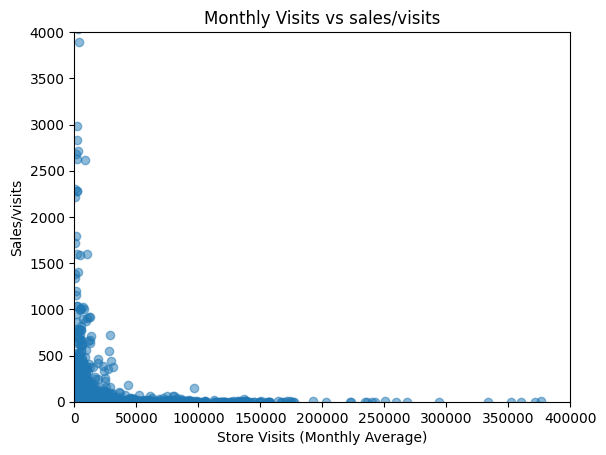

In [48]:
plt.scatter(df['store_visits_monthly_average'], df['sales/visits'], alpha=0.5)
plt.title("Monthly Visits vs sales/visits")
plt.xlabel("Store Visits (Monthly Average)")
plt.ylabel("Sales/visits")
plt.ylim(0,4000)
plt.xlim(0,400000)
plt.show()

In [58]:
df[df['sales/visits']>500].groupby('store_branch_level_2').describe()

block_id                \
                                                count          mean   
store_branch_level_2                                                  
Accessories                                       2.0   7360.000000   
Clothing-related services                         1.0   4704.000000   
Electronics and household appliances              1.0   7342.000000   
Entertainment                                     1.0   6003.000000   
Family Fashion                                   10.0   4305.000000   
Fast Meal                                         3.0   4970.000000   
Footwear                                          1.0   4421.000000   
Furniture & Interior Design                       6.0   6042.333333   
Gourmet Food Products                             2.0   6170.500000   
Hair & Body                                       3.0   9573.666667   
Imaterial services                                1.0   7214.000000   
Jewellery & Watches                               8.0   6167.500000   
Leath. Bags/Luggage                               2.0   5331.000000   
Lingerie & Underwear                              4.0   6348.250000   
Matern./Childr. Fash.                             3.0   3366.000000   
Men's Fashion                                     4.0   4034.750000   
Mobile Phones & Communication                     6.0   4965.333333   
Other product-related services                    1.0   6720.000000   
Others                                            1.0   7546.000000   
Perfumery, beautycare                             2.0   3313.500000   
Service to table restaurants                      1.0  10980.000000   
Sport Clothes & Equipment                         1.0   4559.000000   
Supermarkets                                      1.0   6099.000000   
Tobbaconists, lotteries and other activities      2.0   7477.000000   
Women's Fashion                                   4.0   6761.750000   

                                                                              \
                                                      std      min       25%   
store_branch_level_2                                                           
Accessories                                    272.943218   7167.0   7263.50   
Clothing-related services                             NaN   4704.0   4704.00   
Electronics and household appliances                  NaN   7342.0   7342.00   
Entertainment                                         NaN   6003.0   6003.00   
Family Fashion                                1830.031937    533.0   4490.00   
Fast Meal                                     3209.258326   1268.0   3972.50   
Footwear                                              NaN   4421.0   4421.00   
Furniture & Interior Design                   2188.813986   1759.0   6043.50   
Gourmet Food Products                         1413.506456   5171.0   5670.75   
Hair & Body                                   3359.031160   5695.0   8600.50   
Imaterial services                                    NaN   7214.0   7214.00   
Jewellery & Watches                           1909.769694   1694.0   5986.50   
Leath. Bags/Luggage                            667.508801   4859.0   5095.00   
Lingerie & Underwear                          1204.542894   4556.0   6257.75   
Matern./Childr. Fash.                         2509.683845    494.0   2480.50   
Men's Fashion                                 3707.580287      6.0   1334.25   
Mobile Phones & Communication                 2939.700506   1153.0   2494.00   
Other product-related services                        NaN   6720.0   6720.00   
Others                                                NaN   7546.0   7546.00   
Perfumery, beautycare                         3935.049237    531.0   1922.25   
Service to table restaurants                          NaN  10980.0  10980.00   
Sport Clothes & Equipment                             NaN   4559.0   4559.00   
Supermarkets                                          Na

In [57]:
df[df['sales/visits']>100].groupby('store_branch_level_2').describe()

block_id               \
                                                count         mean   
store_branch_level_2                                                 
Accessories                                       7.0  4146.428571   
Bars, Coffee and Tea breaks                       5.0  6056.800000   
Books, Music & Multimedia                         2.0  8402.500000   
Cards & Gadgets                                   1.0  5112.000000   
Clothing-related services                         1.0  4704.000000   
DIY, gardening                                    1.0  4178.000000   
Electronics and household appliances              8.0  6494.125000   
Entertainment                                     5.0  5878.000000   
Family Fashion                                   35.0  4868.400000   
Fast Meal                                        22.0  5322.954545   
Footwear                                          7.0  6776.285714   
Furniture & Interior Design                      11.0  5680.181818   
General Culture & Media & Technology              1.0    28.000000   
Gourmet Food Products                             9.0  7521.666667   
Hair & Body                                      25.0  5700.080000   
Health Services                                   1.0  6136.000000   
Imaterial services                               10.0  6087.100000   
Jewellery & Watches                              29.0  5711.482759   
Leath. Bags/Luggage                               5.0  5697.200000   
Lingerie & Underwear                              9.0  7008.888889   
Matern./Childr. Fash.                             4.0  4175.750000   
Men's Fashion                                    15.0  4265.733333   
Mobile Phones & Communication                    14.0  5323.428571   
Multiservices shops                               2.0  7461.000000   
Optician                                          8.0  7563.625000   
Other product-related services                    1.0  6720.000000   
Others                                            2.0  7356.500000   
Perfumery, beautycare                            24.0  5119.875000   
Photo services                                    2.0  7281.000000   
Service to table restaurants                     13.0  4736.000000   
Sport Clothes & Equipment                         7.0  4220.571429   
Supermarkets                                      1.0  6099.000000   
Sweet moments                                     6.0  4709.333333   
Themed Gift                                       2.0  5736.000000   
Tobbaconists, lotteries and other activities      4.0  7431.250000   
Toys                                              1.0  4663.000000   
Women's Fashion                                  25.0  5050.040000   

                                                                            \
                                                      std     min      25%   
store_branch_level_2                                                         
Accessories                                   3097.534657    34.0  1573.00   
Bars, Coffee and Tea breaks                   1290.814355  4028.0  5918.00   
Books, Music & Multimedia                     4587.001690  5159.0  6780.75   
Cards & Gadgets                                       NaN  5112.0  5112.00   
Clothing-related services                             NaN  4704.0  4704.00   
DIY, gardening                                        NaN  4178.0  4178.00   
Electronics and household appliances           996.995692  4523.0  5916.50   
Entertainment                                 3448.336121  2253.0  4363.00   
Family Fashion                                2427.142222   515.0  4491.00   
Fast Meal                                     2849.565823   465.0  2897.75   
Footwear                                      2483.370674  4421.0  4876.50   
Furniture & Interior Design                   2088.592244  1759.0  4633.50   
General Culture & Media & Technology                  NaN    28.0    28.00